Modelo Y = b0 * exp(b1 * X)

In [ ]:
# from statsmodels.base.data import ModelData
# Importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Import data
data = pd.read_parquet("exercicio_linearizar_data.parquet")
X = data.X
X = np.log(data.X)
Y = data.Y
#Y = np.log(data.Y)

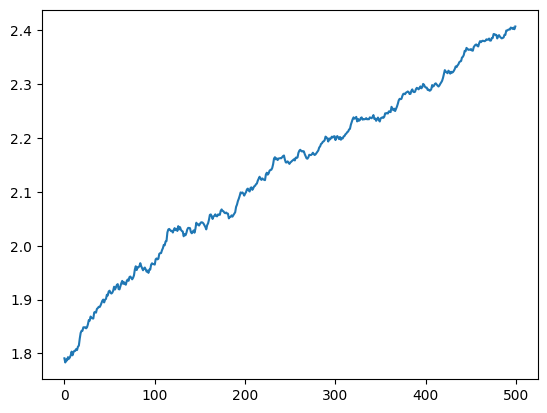

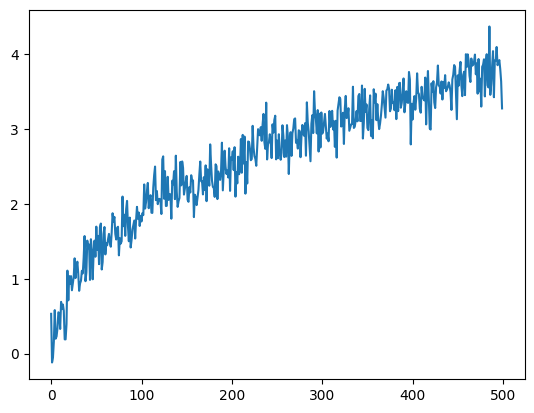

In [ ]:
#Visualizar dados
plt.plot(X)
plt.show()

plt.plot(Y)
plt.show()

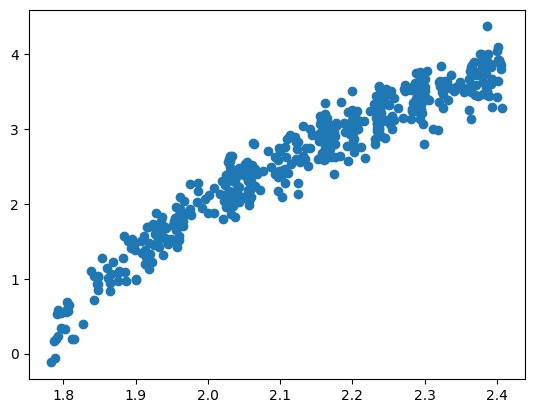

In [ ]:
plt.scatter(X,Y)
plt.show()

In [ ]:
# Ajustar o modelo linear usando statsmodels
X1 = sm.add_constant(X)  # Adicionar uma constante ao modelo
modelo = sm.OLS(Y, X1).fit()

# Obter os resultados do modelo
resumo = modelo.summary()

# Imprimir os resultados
print(resumo)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     6053.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):          8.36e-281
Time:                        23:51:00   Log-Likelihood:                -7.3969
No. Observations:                 500   AIC:                             18.79
Df Residuals:                     498   BIC:                             27.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.5073      0.144    -59.232      0.0

caso 1: Y = -2 + 6.12 * X

caso2: ln(Y) = 1 + 0.5 * X -> y = 2.7114 * e <sup>0.5*X</sup>

# Exercicio

caso1: Y = 0.44 + 0.6091 X

caso2: Y = 0.32 + 1.94 * ln(X)

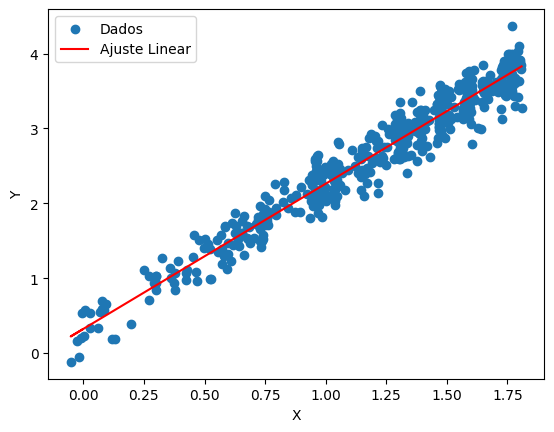

In [ ]:
# Visualizar os dados e a linha de ajuste
plt.scatter(X1.X, Y, label='Dados')
plt.plot(X1.X, modelo.predict(X1), color='red', label='Ajuste Linear')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

print("F-Test p-value < 0.05 indica heterocedasticidade: ")

# Realize o teste de White
white_test = het_white(modelo.resid, X1)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, white_test))

# Realize o teste de Breusch-Pagan
bp_test = het_breuschpagan(modelo.resid, X1)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

F-Test p-value < 0.05 indica heterocedasticidade: 
[('LM Statistic', 1.3427596403473019), ('LM-Test p-value', 0.5110029988658429), ('F-Statistic', 0.6691485525922483), ('F-Test p-value', 0.51260524060807)]
[('LM Statistic', 0.9160909491111591), ('LM-Test p-value', 0.3385034590537788), ('F-Statistic', 0.9141013853260577), ('F-Test p-value', 0.3394924186614835)]


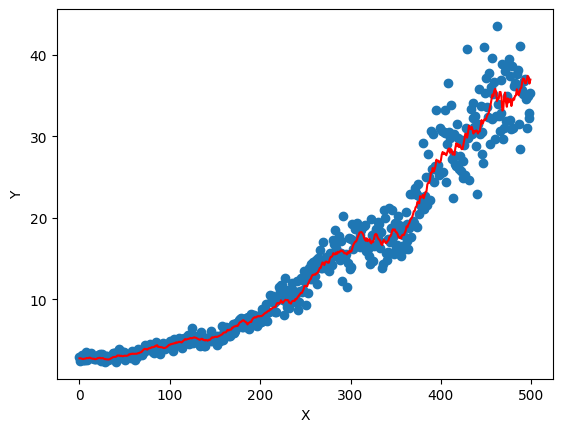

In [ ]:
plt.plot(np.exp(1) * np.exp(0.5*data.X), color='red')
plt.scatter([i for i in range(len(data.Y))], data.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Exercicio

Construa um modelo de regressão usando os dados em exercicio_linearizar_data.parquet

Resposta

$$ y = 0.32 + 1.94 * ln(X) $$

In [ ]:


ln_x = np.log(x)
x1 = sm.add_constant(ln_x)

# y = np.log(y)

modelo = sm.OLS(y,x1).fit()

print(modelo.summary())

# Visualizar os dados e a linha de ajuste
plt.scatter(x1[:, 1], y, label='Dados')
plt.plot(x1[:, 1], modelo.predict(x1), color='red', label='Ajuste Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

NameError: ignored